In [119]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/features.csv")

In [122]:
features

,Unnamed: 0,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age
0,0,6516,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25
1,1,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
2,2,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
3,3,11391,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
4,4,23629,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29508,29508,2698257,0.325203,0.220183,0.388889,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
29509,29509,2698535,0.025424,0.081395,0.500000,0.077586,0.433962,1.000000,0.5,Lower Than A Level,0-35,0.25,0.50
29510,29510,2698535,0.025424,0.081395,0.500000,0.077586,0.433962,1.000000,0.5,Lower Than A Level,0-35,0.25,0.50
29511,29511,2698577,0.188119,0.425532,0.285714,1.000000,1.000000,1.000000,1.0,Lower Than A Level,35-55,0.25,0.75


In [123]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/clickls_per_module.csv")
data

,Unnamed: 0,id_student,code_module,code_presentation,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential
0,0,6516,AAA,2014J,0.196600,0.000292,0.000027,0.000000,0.000027,0.000004,0.0
1,1,8462,DDD,2013J,0.103226,0.000620,0.001050,0.000139,0.000106,0.000000,0.0
2,2,8462,DDD,2014J,0.003769,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,11391,AAA,2013J,1.544000,0.036224,0.002048,0.000000,0.000320,0.000000,0.0
4,4,23629,BBB,2013B,0.110266,0.000053,0.000008,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28913,28913,2698257,AAA,2013J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
28914,28914,2698535,CCC,2014B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
28915,28915,2698535,EEE,2013J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
28916,28916,2698577,BBB,2014J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [124]:
studentRegistration = pd.read_csv("/content/drive/MyDrive/e-learning_dataset/studentRegistration.csv")

In [125]:
student_assessment = pd.read_csv("/content/drive/MyDrive/e-learning_dataset/assessments.csv")

In [126]:
student_assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [127]:
assessment = pd.read_csv("/content/drive/MyDrive/e-learning_dataset/studentAssessment.csv")

In [128]:
assessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [129]:
features.head(10)

,Unnamed: 0,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age
0,0,6516,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25
1,1,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
2,2,8462,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
3,3,11391,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25
4,4,23629,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
5,5,23698,0.500000,0.109375,0.600000,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
6,6,23798,0.428571,0.407186,0.666667,1.000000,0.500000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
7,7,24186,0.285714,0.420168,1.000000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50
8,8,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50
9,9,24213,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50


#Elbow Function

##Clickrate_active feature

In [130]:
sse1 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(features[["clickrate_active"]])
    sse1.append(km.inertia_)

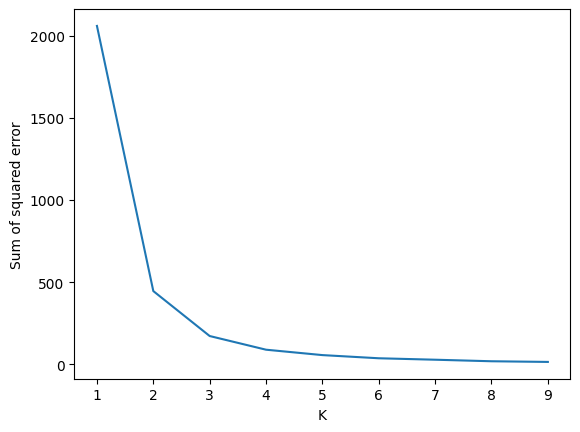

In [131]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse1)

In [132]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(features[["clickrate_active"]])
features['cluster']=y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [133]:
features[features["cluster"]==1].describe(include= 'all')

,Unnamed: 0,id_student,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
count,3471.000000,3.471000e+03,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471,3471,3471.000000,3471.000000,3471.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lower Than A Level,0-35,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642,2612,NaN,NaN,NaN
mean,15564.950447,6.733807e+05,0.980876,0.403909,0.635163,0.935824,0.911623,0.983747,0.993903,NaN,NaN,0.342192,0.559997,1.0
std,8306.765952,4.712213e+05,0.064757,0.309469,0.288523,0.200375,0.194247,0.095251,0.061477,NaN,NaN,0.190648,0.108955,0.0
min,18.000000,2.599700e+04,0.700000,0.007463,0.058824,0.038462,0.083333,0.125000,0.100000,NaN,NaN,0.000000,0.250000,1.0
25%,8016.000000,5.205070e+05,1.000000,0.165426,0.400000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0
50%,16506.000000,6.009470e+05,1.000000,0.306050,0.571429,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.250000,0.500000,1.0
75%,23021.500000,6.505440e+05,1.000000,0.508783,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.500000,0.500000,1.0


##SumScore by module

In [134]:
student_assessment = pd.merge(student_assessment,assessment,on='id_assessment')

In [135]:
student_assessment.drop(["assessment_type","date","weight","date_submitted","is_banked"], axis=1 ,inplace= True)

In [136]:
student_assessment.drop(["id_assessment"], axis=1 ,inplace= True)

In [137]:
SumScore = student_assessment.groupby(["id_student","code_module","code_presentation"])["score"].agg('sum').reset_index()

In [138]:
student_assessment.head()

,code_module,code_presentation,id_student,score
0,AAA,2013J,11391,78.0
1,AAA,2013J,28400,70.0
2,AAA,2013J,31604,72.0
3,AAA,2013J,32885,69.0
4,AAA,2013J,38053,79.0


In [139]:
SumScore.head(10)

,id_student,code_module,code_presentation,score
0,6516,AAA,2014J,309.0
1,8462,DDD,2013J,263.0
2,8462,DDD,2014J,346.0
3,11391,AAA,2013J,410.0
4,23629,BBB,2013B,330.0
5,23698,CCC,2014J,670.0
6,23798,BBB,2013J,1033.0
7,24186,GGG,2014B,500.0
8,24213,DDD,2014B,534.0
9,24391,GGG,2013J,800.0


In [140]:
features = pd.merge(SumScore,features,on='id_student')

In [141]:
features.drop(["Unnamed: 0"], axis=1 ,inplace= True)

In [142]:
features.drop_duplicates(inplace=True)

In [143]:
features.head(10)

,id_student,code_module,code_presentation,score,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster
0,6516,AAA,2014J,309.0,0.060606,0.055556,0.444444,1.000000,0.300000,0.142857,1.0,HE Qualification,55<=,0.00,0.25,0
1,8462,DDD,2013J,263.0,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,0
3,8462,DDD,2014J,346.0,0.200000,0.250000,0.354839,0.375000,0.625000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,0
5,11391,AAA,2013J,410.0,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,0
6,23629,BBB,2013B,330.0,0.100000,0.437500,0.400000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,0
7,23698,CCC,2014J,670.0,0.500000,0.109375,0.600000,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,2
8,23798,BBB,2013J,1033.0,0.428571,0.407186,0.666667,1.000000,0.500000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,2
9,24186,GGG,2014B,500.0,0.285714,0.420168,1.000000,1.000000,1.000000,1.000000,1.0,Lower Than A Level,0-35,0.25,0.50,0
10,24213,DDD,2014B,534.0,0.076923,0.160000,0.517857,0.235294,0.913043,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,0
12,24391,GGG,2013J,800.0,0.100000,0.210280,0.785714,1.000000,1.000000,1.000000,1.0,A Level or Equivalent,0-35,0.50,0.50,0


##Most active : SumScore

In [144]:
sse11 = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    best_active=features[features["code_module"]=="AAA"]
    km.fit(best_active[["score"]])
    sse11.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

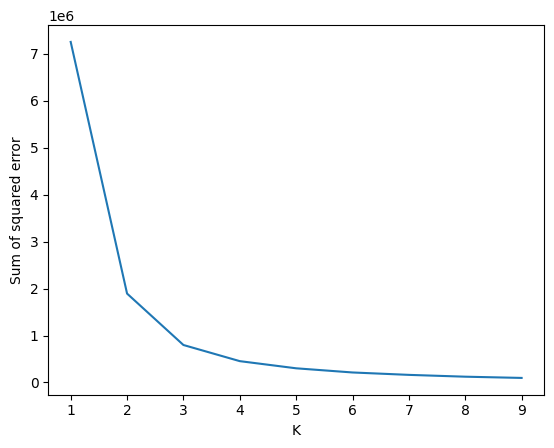

In [145]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse11)

In [146]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(best_active[["score"]])
best_active['cluster_score']=y_predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-146-78b203d1e972>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_active['cluster_score']=y_predicted


❌**Houni kol wehed ithabet f num lcluster li ya3tih jme3et most active khater yetbadel num f kol execution**

In [147]:
best_active[best_active["cluster_score"]==0].describe(include= 'all')

,id_student,code_module,code_presentation,score,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_score
count,3.970000e+02,397,397,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397,397,397.000000,397.000000,397.000000,397.0
unique,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,NaN,NaN
top,NaN,AAA,2013J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Level or Equivalent,35-55,NaN,NaN,NaN,NaN
freq,NaN,397,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212,196,NaN,NaN,NaN,NaN
mean,9.556149e+05,NaN,NaN,376.513854,0.283701,0.113026,0.367171,0.932178,0.572154,0.543944,0.997985,NaN,NaN,0.327456,0.606423,0.788413,0.0
std,9.569272e+05,NaN,NaN,29.143808,0.182290,0.076445,0.175337,0.204792,0.250638,0.358770,0.040151,NaN,NaN,0.219364,0.154406,0.964295,0.0
min,1.139100e+04,NaN,NaN,327.000000,0.032258,0.015152,0.055556,0.076923,0.111111,0.058824,0.200000,NaN,NaN,0.000000,0.250000,0.000000,0.0
25%,2.555480e+05,NaN,NaN,354.000000,0.148000,0.057143,0.227273,1.000000,0.384615,0.250000,1.000000,NaN,NaN,0.000000,0.500000,0.000000,0.0
50%,3.847250e+05,NaN,NaN,377.000000,0.250000,0.090909,0.350000,1.000000,0.500000,0.333333,1.000000,NaN,NaN,0.500000,0.500000,0.000000,0.0
75%,2.010232e+06,NaN,NaN,398.000000,0.363636,0.142857,0.500000,1.000000,0.740741,1.000000,1.000000,NaN,NaN,0.500000,0.750000,2.000000,0.0


In [148]:
best_active[best_active["cluster_score"]==0]

,id_student,code_module,code_presentation,score,clickrate_active,clickrate_reflective,clickrate_global,clickrate_sensing,clickrate_verbal,clickrate_visual,clickrate_sequential,highest_education,age_band,education,age,cluster,cluster_score
5,11391,AAA,2013J,410.0,0.240000,0.028169,0.227273,1.000000,0.800000,1.000000,1.0,HE Qualification,55<=,0.00,0.25,0,0
20,26192,AAA,2014J,431.0,0.545455,0.111111,0.142857,1.000000,0.428571,0.333333,1.0,A Level or Equivalent,35-55,0.50,0.75,2,0
40,28061,AAA,2014J,388.0,0.166667,0.125000,0.538462,1.000000,0.558824,0.166667,1.0,Lower Than A Level,35-55,0.25,0.75,0,0
41,28400,AAA,2013J,332.0,0.225806,0.117647,0.222222,1.000000,0.470588,0.222222,1.0,HE Qualification,35-55,0.00,0.75,0,0
79,31604,AAA,2013J,380.0,0.213333,0.058824,0.560000,1.000000,0.558824,0.500000,1.0,A Level or Equivalent,35-55,0.50,0.75,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31924,2689958,AAA,2013J,408.0,0.457746,0.069767,0.612245,1.000000,0.500000,0.333333,1.0,A Level or Equivalent,35-55,0.50,0.75,2,0
31927,2691206,AAA,2013J,424.0,0.357143,0.055556,0.692308,0.268293,0.818182,0.333333,1.0,A Level or Equivalent,0-35,0.50,0.50,2,0
31944,2692514,AAA,2014J,391.0,0.074074,0.222222,0.090909,1.000000,1.000000,0.333333,1.0,Lower Than A Level,35-55,0.25,0.75,0,0
31952,2694424,AAA,2013J,397.0,0.148438,0.200000,0.166667,1.000000,0.166667,1.000000,1.0,A Level or Equivalent,35-55,0.50,0.75,0,0


In [149]:
reference_module = best_active[best_active["cluster_score"]==0]

##Similarity : Cosine

In [150]:
li = reference_module[["clickrate_reflective",	"clickrate_global",	"clickrate_sensing"	,"clickrate_verbal"	,"clickrate_visual","clickrate_sequential"]].values.tolist()

In [151]:
print(li)

[[0.028169014084507, 0.2272727272727272, 1.0, 0.8, 1.0, 1.0], [0.1111111111111111, 0.1428571428571428, 1.0, 0.4285714285714285, 0.3333333333333333, 1.0], [0.125, 0.5384615384615384, 1.0, 0.5588235294117647, 0.1666666666666666, 1.0], [0.1176470588235294, 0.2222222222222222, 1.0, 0.4705882352941176, 0.2222222222222222, 1.0], [0.0588235294117647, 0.56, 1.0, 0.5588235294117647, 0.5, 1.0], [0.1296296296296296, 0.5862068965517241, 0.5, 0.7142857142857143, 0.1428571428571428, 1.0], [0.0743801652892562, 0.25, 1.0, 0.5, 0.5, 1.0], [0.2448132780082987, 0.4615384615384615, 1.0, 0.5652173913043478, 0.25, 1.0], [0.131578947368421, 0.35, 1.0, 0.4196428571428571, 0.25, 1.0], [0.1, 0.25, 1.0, 0.5, 0.3333333333333333, 1.0], [0.0714285714285714, 0.1111111111111111, 1.0, 0.5, 1.0, 1.0], [0.0961538461538461, 0.4444444444444444, 0.1666666666666666, 0.5, 0.2, 1.0], [0.0161290322580645, 0.1428571428571428, 1.0, 0.7, 0.2, 1.0], [0.088235294117647, 0.358974358974359, 1.0, 0.5833333333333334, 1.0, 1.0], [0.0483

In [152]:
from math import*

sim_list=[]
x=[0.028169014084507, 0.2272727272727272, 1.0, 0.8, 1.0, 1.0]
def square_rooted(x):

    return round(sqrt(sum([a*a for a in x])),3)

def cosine_similarity(x,y):

    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

for i in range(len(reference_module.index)):
   sim = cosine_similarity(li[i],x)
   sim_list.append(sim)

print(sim_list)

[1.0, 0.925, 0.876, 0.903, 0.943, 0.836, 0.96, 0.899, 0.901, 0.932, 0.986, 0.788, 0.91, 0.991, 0.902, 0.988, 0.906, 0.916, 0.875, 0.891, 0.914, 0.863, 0.994, 0.979, 0.979, 0.854, 0.896, 0.915, 0.875, 0.905, 0.9, 0.885, 0.925, 0.937, 0.926, 0.91, 0.97, 0.874, 0.941, 0.851, 0.916, 0.988, 0.969, 0.932, 0.962, 0.88, 0.934, 0.989, 0.917, 0.936, 0.943, 0.878, 0.895, 0.983, 0.933, 0.885, 0.951, 0.964, 0.867, 0.929, 0.904, 0.955, 0.976, 0.825, 0.85, 0.975, 0.962, 0.919, 0.937, 0.993, 0.933, 0.993, 0.979, 0.907, 0.891, 0.865, 0.889, 0.937, 0.972, 1.0, 0.908, 0.951, 0.898, 0.91, 0.965, 0.894, 0.987, 0.875, 0.93, 0.968, 0.906, 0.844, 0.963, 0.927, 0.98, 0.989, 0.869, 0.919, 0.874, 0.949, 0.92, 0.874, 0.964, 0.929, 0.989, 0.924, 0.925, 0.99, 0.905, 0.891, 0.893, 0.973, 0.993, 0.98, 0.972, 0.987, 0.891, 0.968, 0.95, 0.981, 0.866, 0.988, 0.865, 0.926, 0.933, 0.987, 0.855, 0.975, 0.915, 0.996, 0.919, 0.992, 0.997, 0.885, 0.921, 0.911, 0.9, 0.912, 0.983, 0.895, 0.908, 0.955, 0.889, 0.985, 0.887, 0.96,

In [153]:
df = pd.DataFrame(list(zip(reference_module["id_student"],reference_module["education"],reference_module["age"],sim_list)),
               columns =["id_student", "education","age",'similarity'])

In [154]:
df.sort_values(by=['similarity'],inplace=True)

In [155]:
different_LS = df.head(10)

In [156]:
age_education=[0.25,0.00]
sim_list=[]
li = different_LS[["age",	"education"]].values.tolist()
for i in range(len(different_LS.index)):
   sim = cosine_similarity(li[i],age_education)
   sim_list.append(sim)

print(sim_list)


[0.447, 1.0, 0.447, 0.832, 1.0, 0.948, 0.948, 0.707, 0.948, 0.832]


In [157]:
different_LS["similarity_education_age"]=sim_list

<ipython-input-157-905aa13bddb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  different_LS["similarity_education_age"]=sim_list


In [158]:
different_LS

,id_student,education,age,similarity,similarity_education_age
255,705379,0.50,0.25,0.755,0.447
249,593987,0.00,0.75,0.760,1.000
262,998493,0.50,0.25,0.765,0.447
217,410092,0.50,0.75,0.770,0.832
158,331358,0.00,0.75,0.776,1.000
307,2122180,0.25,0.75,0.781,0.948
11,57506,0.25,0.75,0.788,0.948
297,2010232,0.50,0.50,0.799,0.707
334,2412002,0.25,0.75,0.814,0.948
279,1640609,0.50,0.75,0.818,0.832


❎**saye hedhom 10 etudiants li a9reb lel etudiant mte3i tawa. Nekhtarou ab3ed wehdin f similarity w a9reb wehdin f similarity_education_age**

